In [55]:
import tensorflow as tf;
print(tf.__version__)

2.6.0


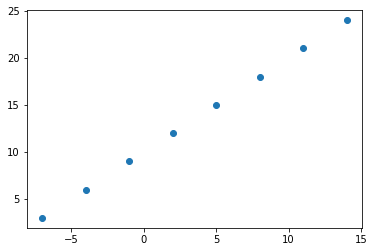

In [56]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # features
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # labels

plt.scatter(X, Y)




In [57]:
X = tf.constant(X)
Y = tf.constant(Y)
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape, X[0]

temp = tf.constant(np.arange(1, 13))
temp

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])>

## Steps in modelling with Tensorflow

1. create a model --- input, output, hidden layer
2. compiling a model --- loss function, optimizer, evaluation metrics
3. fitting a model --- let the model find pattern between X, Y


## Improve the model

1. create a model --- add more layers, increase hidden units/neurons within each hidden layer, change activation function of each layer
2. compiling a model --- change optimization function, learning rate
3. fitting a model --- more epochs, or more data for the model to learn from 
 

In [58]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, Y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 295ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [59]:
print(X, Y, "\n")
model.predict([17.0])

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64) 



array([[12.716021]], dtype=float32)

**Evaluate a model**



In [60]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

**Visualize data**

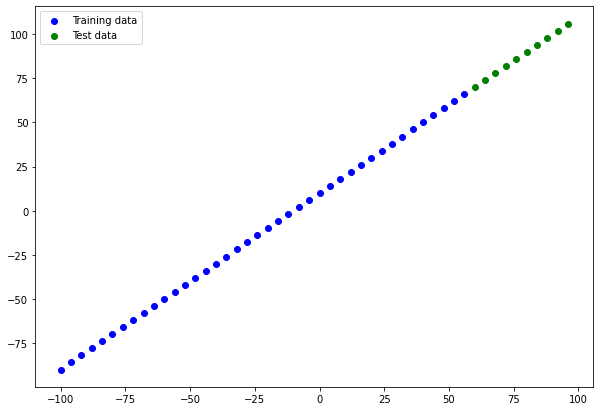

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend() # 加图例

In [62]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(1, name="output")
    tf.keras.layers.Dense(1, input_shape=[1], name="output_1")
], name="model_1")
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100, verbose=0)
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_1 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [63]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="output_2")
    # tf.keras.layers.Dense(1, input_shape=[1], name="output")
], name="model_2")
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_2 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**visualize model**

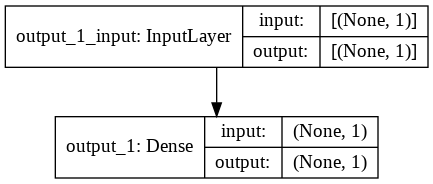

In [64]:

from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

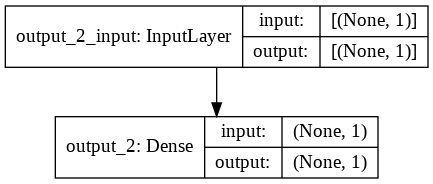

In [65]:
plot_model(model_2, show_shapes=True)

In [66]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.Input(shape=(16,), name="input_layer"))
# model.add(tf.keras.layers.Dense(32, activation='relu', name="hidden_layer"))
# model.add(tf.keras.layers.Dense(30, name="output_layer"))
# model.summary()

In [67]:
# plot_model(model=model, show_shapes=True)

##visualize prediction

In [68]:
y_preds_1 = model_1.predict(X_test)
y_preds_1.shape, X_test.shape, y_test.shape, y_preds_1


((10, 1), (10,), (10,), array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32))

In [69]:
y_preds_2 = model_2.predict(X_test)
y_preds_2.shape, X_test.shape, y_test.shape, y_preds_2


((10, 1), (10,), (10,), array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32))

In [70]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_preds_1):
  """
  Plot training data, test data and compare predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c='b', label="Training data")
  plt.scatter(test_data, test_label, c='g', label="Test data")
  plt.scatter(test_data, predictions, c='r')
  plt.legend()


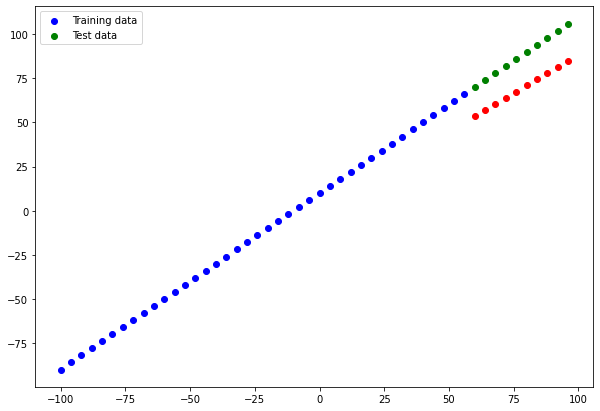

In [71]:
plot_predictions(predictions=y_preds_1)

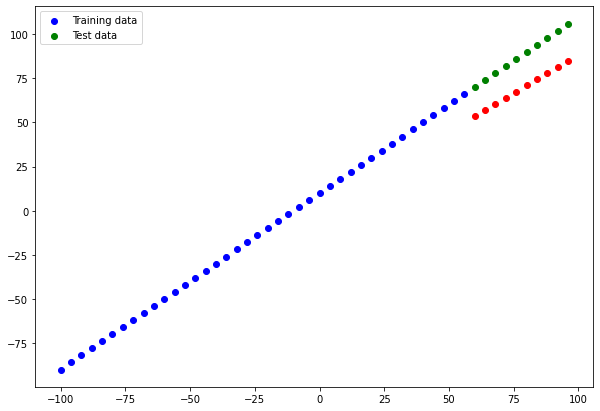

In [72]:
plot_predictions(predictions=y_preds_2)

##Evaluate the metrics


*   mean absolute error
*   mean squared error --- more sensitive to outliers



In [73]:
y_preds_1, y_test

(array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32),
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [74]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_preds_1))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [75]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_preds_1))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [76]:
def mae(y_test, y_pred):
  """
  mean absolute error
  """
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  """
  mean squared error
  """
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

In [77]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

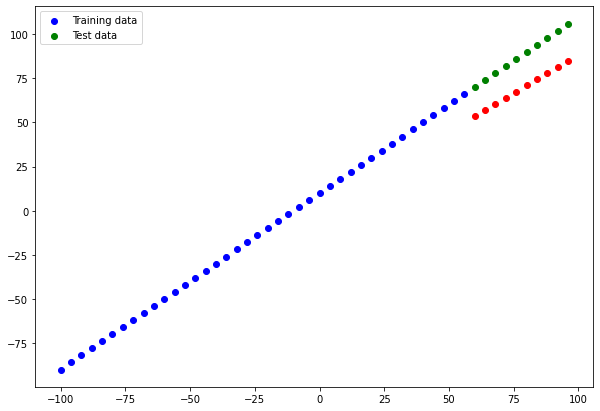

In [78]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [79]:
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [80]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_2.fit(X_train, y_train, epochs=100)
model.summary()

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

In [81]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


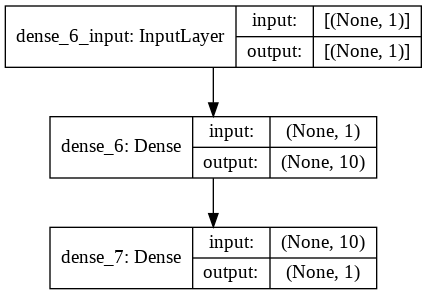

In [82]:
plot_model(model_2, show_shapes=True)

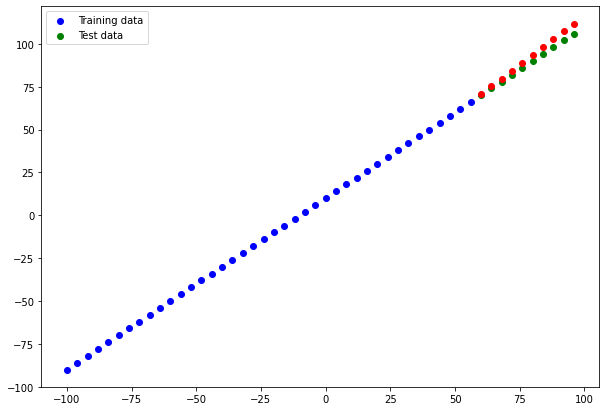

In [83]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [84]:
# evaluate model_2 predictions
mae_2 = mae(y_test=y_test, y_pred=y_preds_2).numpy()
mse_2 = mse(y_test=y_test, y_pred=y_preds_2).numpy()
mae_2, mse_2


(3.1969407, 13.070143)

🔑**Note**: start with small models, make sure they work and then increase complexity

##Compare results of experiments using a pandas DataFrame

In [85]:
import pandas as pd
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143


**Tracking your experiments**

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).


> 📖 Resource: But as you build more models, you'll want to look into using tools such as:
*   **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
*   **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).



##Saving and loading a model



1.   SavedModel format(default)
2.   HDF5 format





In [86]:
model_2.summary()
model_2.save('best_model')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: best_model/assets


In [87]:
!ls best_model/

assets	keras_metadata.pb  saved_model.pb  variables


In [88]:
model_2.save("best_model.h5")

In [89]:
!ls best_model.h5

best_model.h5


In [90]:
loaded_model = tf.keras.models.load_model("/content/best_model.h5")
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
loaded_model_preds = loaded_model.predict(X_test)
loaded_model_preds == model_2.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [92]:
from google.colab import files
files.download("best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Larger example --- medical cost

In [99]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_one_hot = pd.get_dummies(insurance)


(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d8948ec10>)

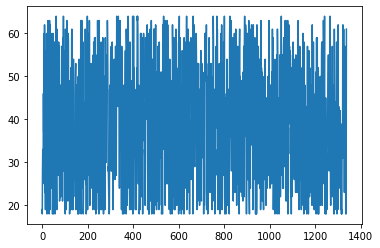

In [150]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X.head(), X["age"].plot()

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train

(      age     bmi  ...  region_southeast  region_southwest
 560    46  19.950  ...                 0                 0
 1285   47  24.320  ...                 0                 0
 1142   52  24.860  ...                 1                 0
 969    39  34.320  ...                 1                 0
 486    54  21.470  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1095   18  31.350  ...                 0                 0
 1130   39  23.870  ...                 1                 0
 1294   58  25.175  ...                 0                 0
 860    37  47.600  ...                 0                 1
 1126   55  29.900  ...                 0                 1
 
 [1070 rows x 11 columns], 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Lengt

In [121]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

history = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13313.2891 - mae: 13313.2891
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13134.1592 - mae: 13134.1592
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12778.1670 - mae: 12778.1670
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12080.7412 - mae: 12080.7412
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10908.3369 - mae: 10908.3369
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9424.7705 - mae: 9424.7705
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8105.4365 - mae: 8105.4365
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7522.3076 - mae: 7522.3076
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7435.4062 - mae: 7435.4062
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7415.0488 - mae:

Text(0, 0.5, 'epoches')

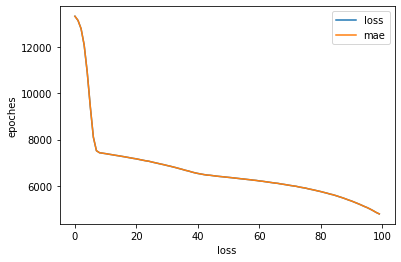

In [124]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epoches")

In [126]:
history2 = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

Text(0, 0.5, 'epoches')

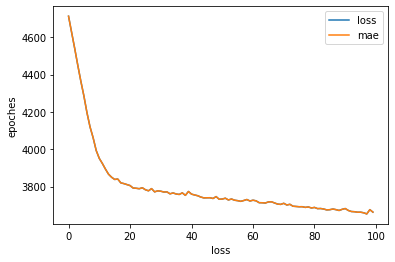

In [130]:
pd.DataFrame(history2.history).plot()
plt.xlabel("loss")
plt.ylabel("epoches")

In [149]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [148]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [157]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# history = insurance_model.fit(X_train, y_train, epochs=100)

insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96